In [ ]:
#plotting TimeSeries data
# Story telling of different data using pandas and matplotlib

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [4]:
payments_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/payments-data.csv')
payments_data.head(4)

,Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,...,Product_Category_or_Therapeutic_Area_4,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4,Associated_Drug_or_Biological_NDC_4,Covered_or_Noncovered_Indicator_5,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5,Product_Category_or_Therapeutic_Area_5,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5,Associated_Drug_or_Biological_NDC_5,Program_Year,Payment_Publication_Date
0,NEW,Covered Recipient Physician,NaN,NaN,NaN,132655.0,GREGG,D,ALZATE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,06/30/2017
1,NEW,Covered Recipient Physician,NaN,NaN,NaN,132655.0,GREGG,D,ALZATE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,06/30/2017
2,NEW,Covered Recipient Physician,NaN,NaN,NaN,1006832.0,SADEER,JABBAR,ALZUBAIDI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,06/30/2017
3,NEW,Covered Recipient Physician,NaN,NaN,NaN,1006832.0,SADEER,JABBAR,ALZUBAIDI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,06/30/2017


In [3]:
payments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 75 columns):
Change_Type                                                          29999 non-null object
Covered_Recipient_Type                                               29999 non-null object
Teaching_Hospital_CCN                                                79 non-null float64
Teaching_Hospital_ID                                                 79 non-null float64
Teaching_Hospital_Name                                               79 non-null object
Physician_Profile_ID                                                 29920 non-null float64
Physician_First_Name                                                 29920 non-null object
Physician_Middle_Name                                                22778 non-null object
Physician_Last_Name                                                  29918 non-null object
Physician_Name_Suffix                                                1027 non-

In [9]:
columns = payments_data.columns.tolist()

In [12]:
list(filter(lambda x: x.startswith('Date'),columns))

['Date_of_Payment']

In [13]:
payments_data.Date_of_Payment.dtype

dtype('O')

### Data is not in right format to work

In [16]:
payments_data["Date_of_Payment_for"] = pd.to_datetime(payments_data.Date_of_Payment)

In [18]:
payments_data.Date_of_Payment_for.dtype

dtype('<M8[ns]')

In [19]:
payments_data[payments_data.Date_of_Payment_for == ""

KeyError: "None of [DatetimeIndex(['2016-02-12', '2016-02-13', '2016-02-13', '2016-01-26',\n               '2016-01-26', '2016-02-12', '2016-02-19', '2016-02-12',\n               '2016-02-13', '2016-04-05',\n               ...\n               '2016-07-12', '2016-07-12', '2016-07-12', '2016-07-13',\n               '2016-07-13', '2016-07-13', '2016-07-13', '2016-08-04',\n               '2016-08-04', '2016-08-04'],\n              dtype='datetime64[ns]', length=29999, freq=None)] are in the [columns]"

In [20]:
payments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 76 columns):
Change_Type                                                          29999 non-null object
Covered_Recipient_Type                                               29999 non-null object
Teaching_Hospital_CCN                                                79 non-null float64
Teaching_Hospital_ID                                                 79 non-null float64
Teaching_Hospital_Name                                               79 non-null object
Physician_Profile_ID                                                 29920 non-null float64
Physician_First_Name                                                 29920 non-null object
Physician_Middle_Name                                                22778 non-null object
Physician_Last_Name                                                  29918 non-null object
Physician_Name_Suffix                                                1027 non-

In [26]:
day_wise_payment= payments_data.groupby("Date_of_Payment_for").Total_Amount_of_Payment_USDollars.sum()

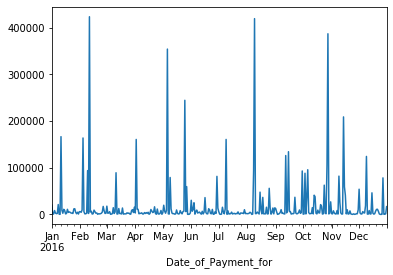

In [27]:
day_wise_payment.plot()

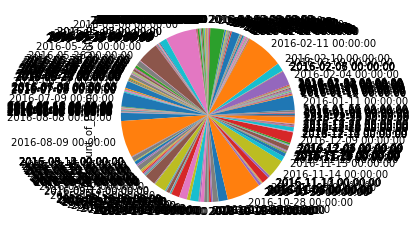

In [31]:
day_wise_payment.plot.pie()

In [68]:
payments_data["day-of-week"] = payments_data.Date_of_Payment.map(lambda x: pd.Timestamp(x).day_name())
payments_data["day-of-week"].value_counts().nlargest(3)

Friday     8523
Monday     4655
Tuesday    4116
Name: day-of-week, dtype: int64

In [3]:
import pandas as pd
import numpy as np

In [4]:
churn_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/churn.csv.txt',parse_dates = ['last_trip_date','signup_date'])
churn_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [5]:
churn_data["customer_data_usuage"] = churn_data.last_trip_date - churn_data["signup_date"]

In [6]:
a = churn_data["signup_date"].value_counts()
a.plot()

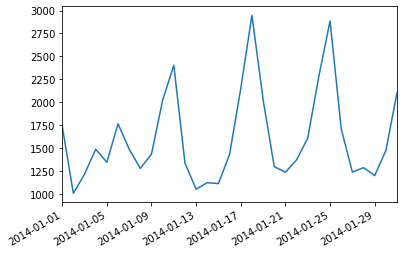

In [48]:
churn_data["signup_date"].value_counts().sort_values().plot()

In [7]:
b = churn_data["signup_date"].value_counts()

In [8]:
b.nlargest(1)

2014-01-18    2948
Name: signup_date, dtype: int64

### Find day of week  for more registerations

In [9]:
churn_data["day_of_week"] = churn_data.signup_date.map(lambda x : pd.Timestamp(x).day_name())

In [10]:
churn_data

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,customer_data_usuage,day_of_week
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,143 days,Saturday
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,96 days,Wednesday
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1 days,Monday
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,170 days,Friday
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,47 days,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5.63,4.2,5.0,1.00,King's Landing,2014-06-05,iPhone,2014-01-25,0.0,0,False,100.0,131 days,Saturday
49996,0.00,4.0,NaN,1.00,Astapor,2014-01-25,iPhone,2014-01-24,0.0,1,False,0.0,1 days,Friday
49997,3.86,5.0,5.0,1.00,Winterfell,2014-05-22,Android,2014-01-31,0.0,0,True,100.0,111 days,Friday
49998,4.58,3.5,3.0,1.00,Astapor,2014-01-15,iPhone,2014-01-14,0.0,2,False,100.0,1 days,Tuesday


In [11]:
churn_data["day_of_week"].value_counts().nlargest(1)

Friday    9767
Name: day_of_week, dtype: int64

In [12]:
churn_data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,customer_data_usuage
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084,92 days 18:57:44.640000
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503,62 days 03:06:56.580842
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0 days 00:00:00
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000,27 days 00:00:00
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,110 days 00:00:00
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000,150 days 00:00:00
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,181 days 00:00:00


In [13]:
churn_data.customer_data_usuage.dtype

dtype('<m8[ns]')

In [58]:
import datetime

In [25]:
churn_data['customer_data_usuage_int']  = pd.to_numeric(churn_data['customer_data_usuage'])

In [57]:
def f(r):
    if r < datetime.timedelta(27,0,0):
        return "Broze"
    elif r>datetime.timedelta(110,0,0) and r<datetime.timedelta(175,0,0):
        return "Sliver"
    elif r>datetime.timedelta(200,0,0) and r<datetime.timedelta(211,0,0):
        return "Gold"
    else:
        return "Platinum"
churn_data["type_customers"] = churn_data['customer_data_usuage_int'].map(f)

TypeError: '<' not supported between instances of 'int' and 'datetime.timedelta'

In [41]:
churn_data.type_customers.value_counts()

Platinum    47698
Broze        2302
Name: type_customers, dtype: int64

In [34]:
pd.Timestamp.is_leap_year("2000")

TypeError: 'property' object is not callable

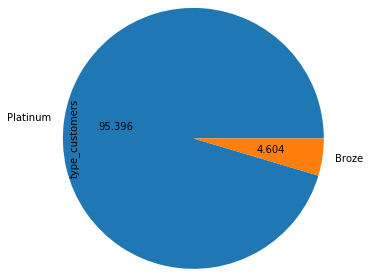

In [54]:
churn_data.type_customers.value_counts().plot.pie(radius = 1.5,autopct = "%.3f")

In [ ]:
def f(r):
    r = int(str(r).split()[0])
    if (r >= 0) & (r <= 27):
        return 'Brown'
    elif (r > 27) & (r<= 110):
        return 'Silver'
    elif (r > 110) & (r <= 150):
        return 'Gold'
    elif (r > 150):
        return 'Diamond'
   
customer_churn_data['Customer_class'] = customer_churn_data.Number_of_days.map(f)
 